In [ ]:
#kNN verstehen

def kNN(img_input, k=5):
    dist = []
    counter = [0,0,0,0,0,0,0,0,0,0] #?
    max_indices = []
    for i in range(0, train_array.shape[0]): # 0 in eckigen Klammern
        dist.append(np.linalg.norm(img_input-train_array[i, 1:])) # für jedes Bild eine (60.000)für jede Zeile, also jedes Bild wird diese Funktion ausgeführt, also die Destanz zwischen dem Bild une inem Bild des Train arrays np linals zu dust hinzugefügt

    small_dist = sorted(range(len(dist)), key = lambda sub: dist[sub])[:k] # liste mit k indizes liste wird sortiert #? syntax klammern

    for j in range(0, len(small_dist)):
        counter[train_array[small_dist[j],0]] += 1 # zahl für den jeweiligen index wird zu counter addiert

    for k in range(0, len(counter)):
        if counter[k] == max(counter):
            max_indices.append(k)

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        return 10
   


In [ ]:
def validation_kNN(s_size, k=5):
    true = 0
    false = 0
    doppel_max = 0

    for i in range(0, s_size):
        result_kNN = kNN(test_array[i, 1:], k)
        if result_kNN == 10:
            doppel_max += 1
        elif result_kNN != test_array[i, 0]:
            false += 1
        elif result_kNN == test_array[i, 0]:
            true += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
Anzahl mit mehreren Maxima: {doppel_max}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')


In [1]:
#packages importieren
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#load data
train_digits = pd.read_csv("data/mnist_train.csv")
test_digits = pd.read_csv("data/mnist_test.csv")
type(train_digits)

pandas.core.frame.DataFrame

In [2]:
#convert pandas Data Frame to Numpy Array
train_array = train_digits.to_numpy()
test_array = test_digits.to_numpy()
# Datensatz hat 59999 Zeilen
train_array.shape


(59999, 785)

In [3]:
#show image 
def show_digit(sample):
    img = test_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

In [4]:
#compute average intensities of all rows describing the same number
#imshow as output
def avg_digit_img(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))
    
    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    #shape image
    avg.shape = (28,28)
    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #show image and colorbar
    plt.imshow(avg, 'gray')
    plt.colorbar()


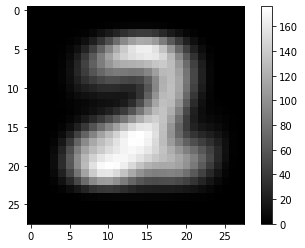

In [5]:
#use function avg_digit_img to look at average image of digit 2
avg_digit_img(train_array, 2)

In [6]:
#computes average intensities of all rows describing the same number
#returns numpy array
def avg_digit_arr(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))

    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]

    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #return 1 dimensional array
    return avg

In [7]:
#use function avg_digit_arr to look at array of average image of all ones
avg_digit_arr(train_array, 1)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.62770691e-02, 7.53485613e-02,
        1.05309997e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [8]:
#compare sample image with averaged images pixel by pixel
#select digit with lowest difference in intensity (output)
def digit_recognition(sample):

    intensities_list = [] #will be filled with average intensity differences for each average? digit 
    sample_img = test_array[sample-1, 1:] #create array with intensity values of sample

    #subtract avg array from sample array and store as difference array (diff_arr)
    #? werden die Differenzen für alle Zahlen addiert? Oder zehn arrays erstellt?
    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        

        #turn difference array to difference list
        #? warum eine Liste?
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        #sum all absolute values of difference list and assign to variable intensity_sum
        #ß wo differences für einzelne Zahlen?
        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        #append intensities_list by intensity sum
        #at the end of for loop, intensites_list contains 1 value for each of the 10 digits
        intensities_list.append(intensity_sum)

    #select smallest value and return as output
    return intensities_list.index(min(intensities_list))

9
9


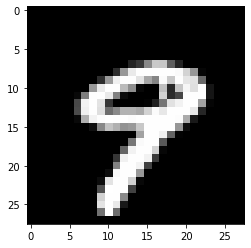

In [9]:
#try out digit_recognition function
print(digit_recognition(9))
show_digit(9)
print(test_array[8,0]) #note: here we use the index and not the number of the digit
#? Reihenfolge unten?

In [10]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

